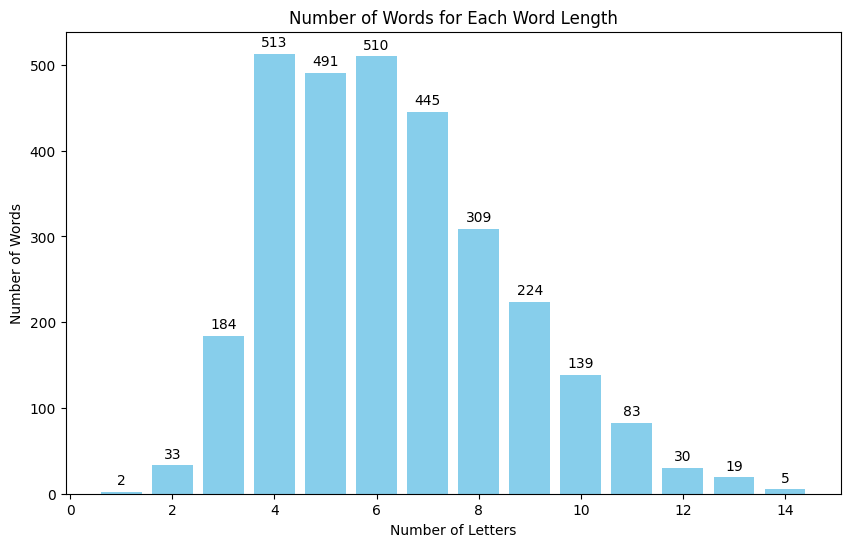

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


file_path = 'Oxford 3000.txt'  
with open(file_path, 'r') as file:
    words = file.read().split()


word_lengths = [len(word) for word in words]


length_counts = pd.Series(word_lengths).value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
bars = plt.bar(length_counts.index, length_counts.values, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Number of Letters')
plt.ylabel('Number of Words')
plt.title('Number of Words for Each Word Length')
plt.xticks(rotation=0)
plt.show()


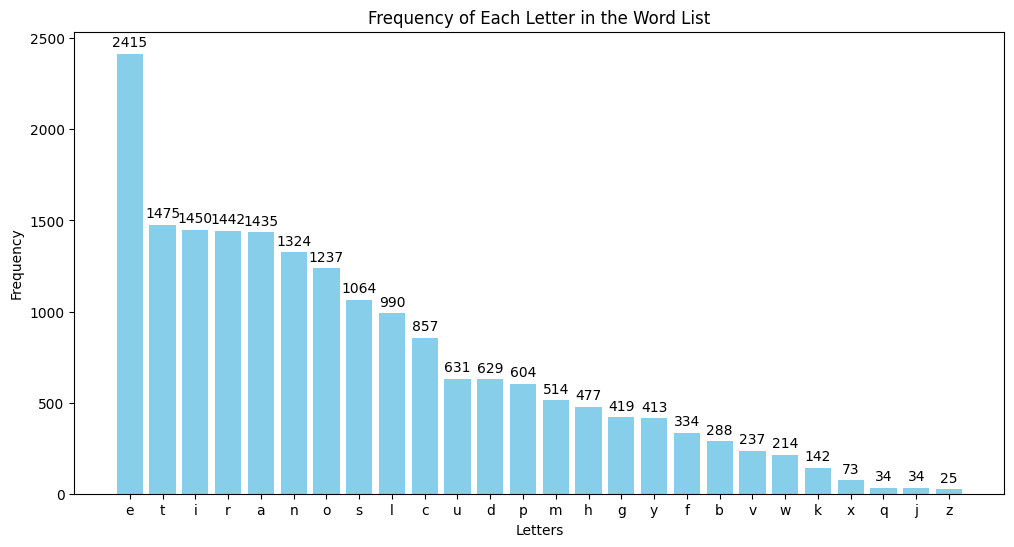

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import string


file_path = 'Oxford 3000.txt' 
with open(file_path, 'r') as file:
    words = file.read().split()


all_letters = ''.join(words)
letter_counts = Counter(all_letters)


letters = string.ascii_lowercase
letter_frequencies = {letter: letter_counts[letter] for letter in letters}


letter_series = pd.Series(letter_frequencies).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
bars = plt.bar(letter_series.index, letter_series.values, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of Each Letter in the Word List')
plt.xticks(rotation=0)
plt.show()


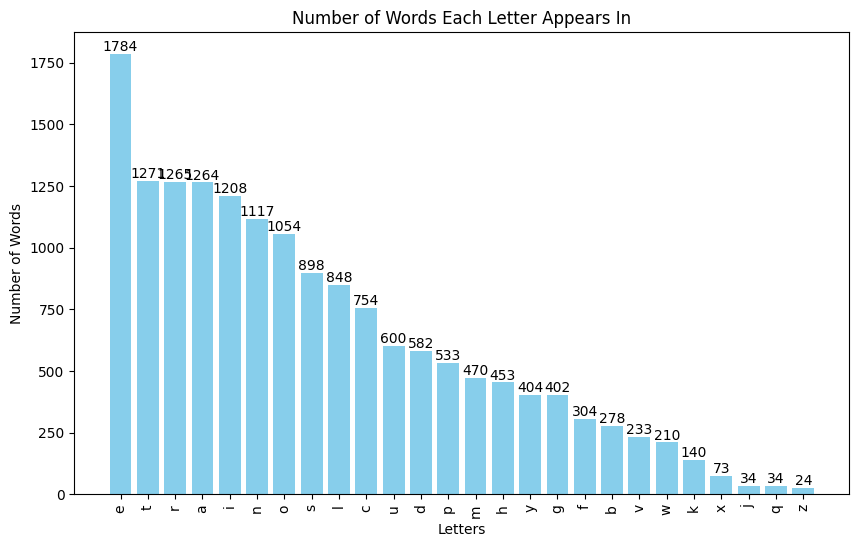

In [6]:
import matplotlib.pyplot as plt
import string


file_path = 'Oxford 3000.txt'  

with open(file_path, 'r') as file:
    words = file.read().splitlines()


letter_counts = {letter: 0 for letter in string.ascii_lowercase}

for word in words:
    unique_letters = set(word)  
    for letter in unique_letters:
        if letter in letter_counts:
            letter_counts[letter] += 1


sorted_letter_counts = dict(sorted(letter_counts.items(), key=lambda item: item[1], reverse=True))


letters = list(sorted_letter_counts.keys())
counts = list(sorted_letter_counts.values())


plt.figure(figsize=(10, 6))
bars = plt.bar(letters, counts, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Letters')
plt.ylabel('Number of Words')
plt.title('Number of Words Each Letter Appears In')
plt.xticks(rotation=90)
plt.show()


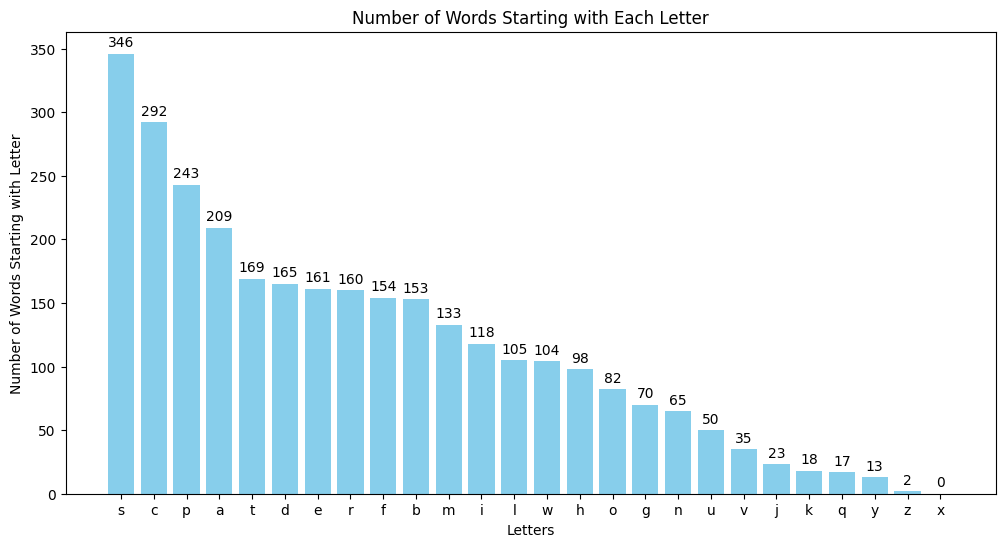

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import string


file_path = 'Oxford 3000.txt'
with open(file_path, 'r') as file:
    words = file.read().split()


starting_letters = [word[0] for word in words]
letter_counts = Counter(starting_letters)


letters = string.ascii_lowercase
letter_frequencies = {letter: letter_counts.get(letter, 0) for letter in letters}


letter_series = pd.Series(letter_frequencies).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
bars = plt.bar(letter_series.index, letter_series.values, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Letters')
plt.ylabel('Number of Words Starting with Letter')
plt.title('Number of Words Starting with Each Letter')
plt.xticks(rotation=0)
plt.show()


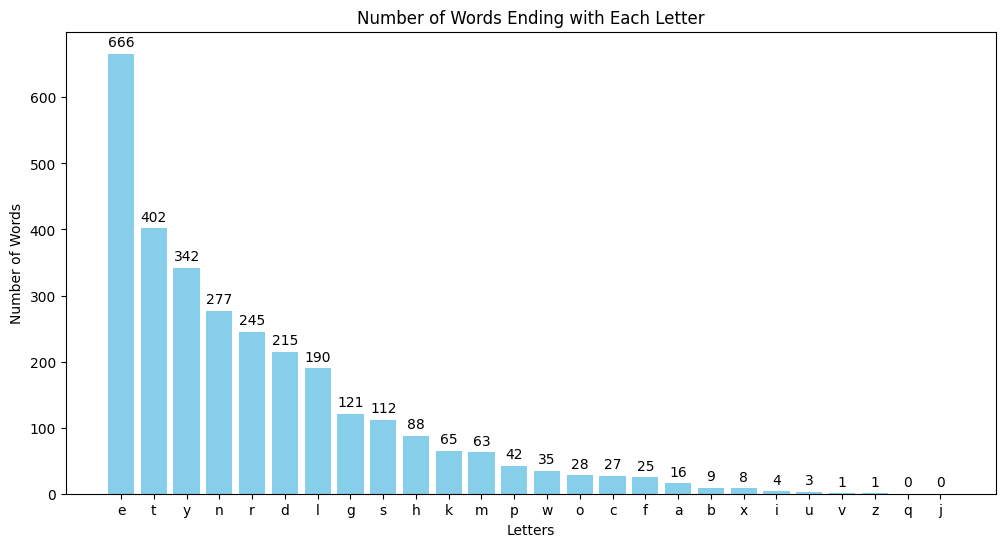

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import string


file_path = 'Oxford 3000.txt'  
with open(file_path, 'r') as file:
    words = file.read().split()


starting_letters = [word[-1] for word in words]
letter_counts = Counter(starting_letters)


letters = string.ascii_lowercase
letter_frequencies = {letter: letter_counts.get(letter, 0) for letter in letters}


letter_series = pd.Series(letter_frequencies).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
bars = plt.bar(letter_series.index, letter_series.values, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Letters')
plt.ylabel('Number of Words')
plt.title('Number of Words Ending with Each Letter')
plt.xticks(rotation=0)
plt.show()


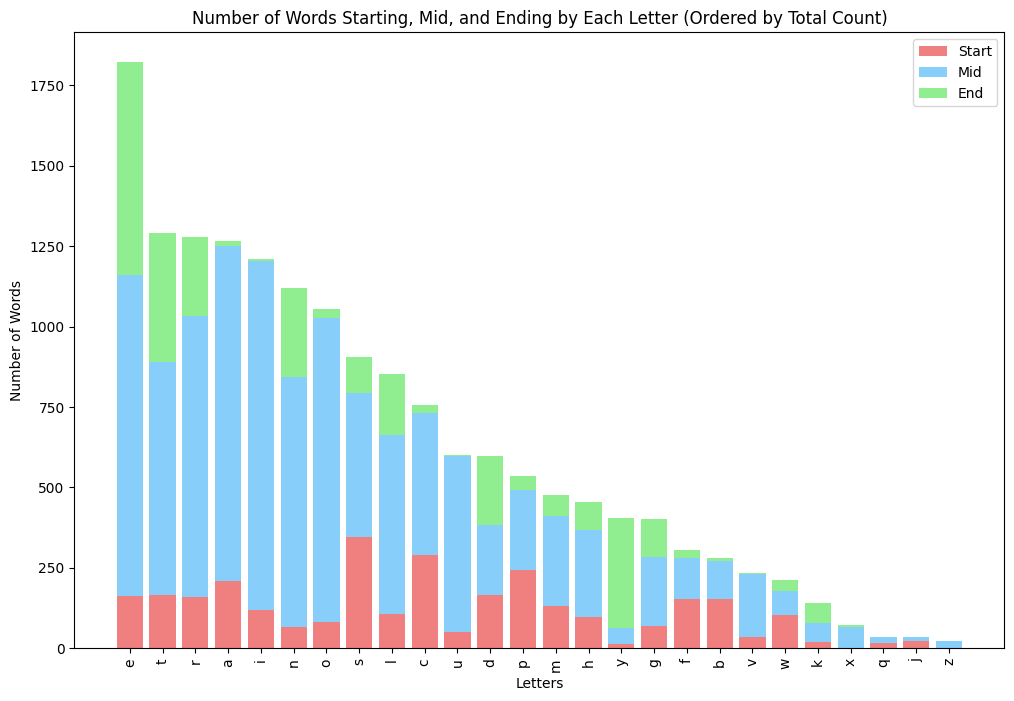

In [1]:
import matplotlib.pyplot as plt
import string


file_path = 'Oxford 3000.txt'  

with open(file_path, 'r') as file:
    words = file.read().splitlines()


start_counts = {letter: 0 for letter in string.ascii_lowercase}
mid_counts = {letter: 0 for letter in string.ascii_lowercase}
end_counts = {letter: 0 for letter in string.ascii_lowercase}


for word in words:
    if word:  
        first_letter = word[0]
        last_letter = word[-1]
        unique_letters = set(word)

        if first_letter in start_counts:
            start_counts[first_letter] += 1
        if last_letter in end_counts:
            end_counts[last_letter] += 1
        for letter in unique_letters:
            if letter != first_letter and letter != last_letter:
                if letter in mid_counts:
                    mid_counts[letter] += 1


letters = list(string.ascii_lowercase)
total_counts = [start_counts[letter] + mid_counts[letter] + end_counts[letter] for letter in letters]
ordered_letters = [x for _, x in sorted(zip(total_counts, letters), reverse=True)]
ordered_start_values = [start_counts[letter] for letter in ordered_letters]
ordered_mid_values = [mid_counts[letter] for letter in ordered_letters]
ordered_end_values = [end_counts[letter] for letter in ordered_letters]


plt.figure(figsize=(12, 8))
plt.bar(ordered_letters, ordered_start_values, color='lightcoral', label='Start')
plt.bar(ordered_letters, ordered_mid_values, bottom=ordered_start_values, color='lightskyblue', label='Mid')
plt.bar(ordered_letters, ordered_end_values, bottom=[i+j for i,j in zip(ordered_start_values, ordered_mid_values)], color='lightgreen', label='End')

plt.xlabel('Letters')
plt.ylabel('Number of Words')
plt.title('Number of Words Starting, Mid, and Ending by Each Letter (Ordered by Total Count)')
plt.xticks(rotation=90)
plt.legend()
plt.show()
